In [1]:
# Required packages and data paths
# Scanpy 1.7
import anndata as ad
import numpy as np
import episcanpy.api as epi
import scipy.io as scio
import pandas as pd

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
OUTPUT_PATH = f'{STUD_PATH}stud2/output/'

In [2]:
# define path to input sample
TISSUE = "liver_sample_7"
INPUT_PATH = f'{DATA_PATH}catlas_objects/{TISSUE}.h5ad'

### Read input file

In [3]:
# load input sample, remove cells without features and features without corresponding cells
adata = ad.read(INPUT_PATH)
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 28100 × 1150152
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells'

#### Replace separator in var_names

In [4]:
names = []
for name in adata.var_names:
    names.append(name)

for i, n in enumerate(names):
    tmp = names[i].replace(':', '_')
    tmp = tmp.replace('-', '_')
    tmp = tmp.split('_')
    names[i] = '_'.join([tmp[0], tmp[-2], tmp[-1]])

adata.var_names = pd.Index(names)

In [5]:
adata.raw = adata

In [6]:
# binarize loaded data
epi.pp.binarize(adata)
adata.layers['binary'] = adata.X.copy()

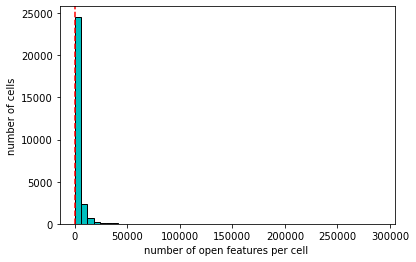

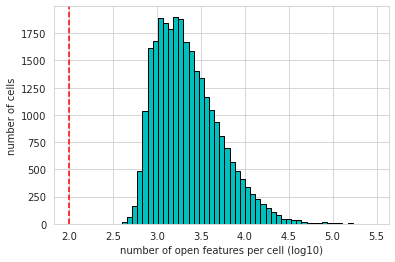

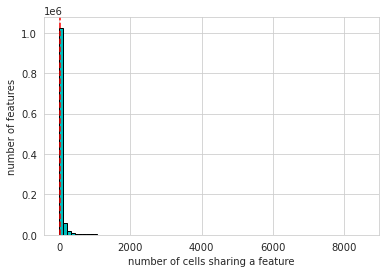

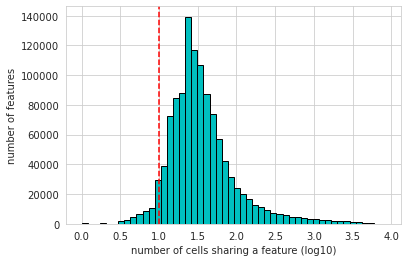

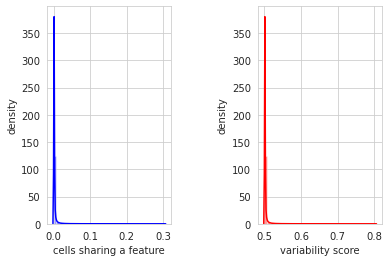

In [7]:
# show open features per cell
min_features = 100

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

# show numbers of cells sharing features
min_cells = 10

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

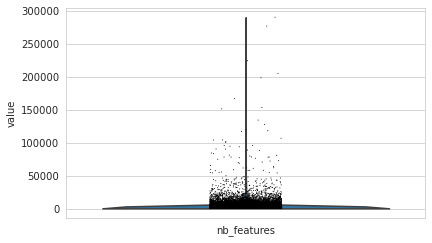

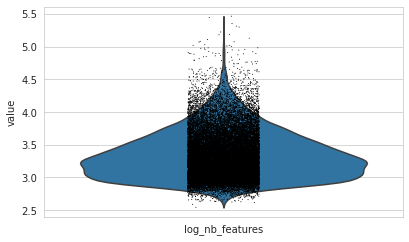

In [8]:
# get overview how many features majority of cells has
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

In [9]:
# remove cells with more than 10k features / less than 100
epi.pp.filter_cells(adata, min_features=100)
epi.pp.filter_cells(adata, max_features=10000)

In [10]:
# remove features without cells / more than 150 cells sharing
epi.pp.filter_features(adata, min_cells=10)
epi.pp.filter_features(adata, max_cells=150)

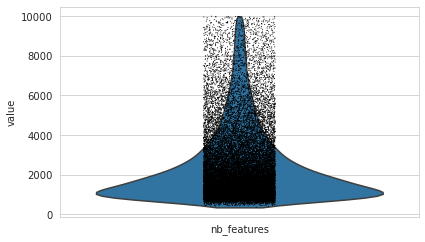

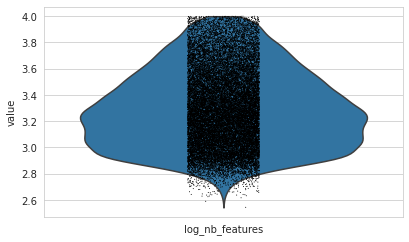

In [11]:
# show filtered overview of cells
epi.pl.violin(adata, ['nb_features'])
epi.pl.violin(adata, ['log_nb_features'])

#### Write files for wp4

In [12]:
# Write data for wp4
output_wp4 = f'{OUTPUT_PATH}wp4/{TISSUE}'
adata.var.to_csv(f'{output_wp4}_var.csv', sep='\t')
scio.mmwrite(f'{output_wp4}_X.mtx', adata.X)
adata

AnnData object with n_obs × n_vars = 26479 × 877336
    obs: 'nb_features', 'log_nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'binary'

### Normalize and write to file

In [13]:
# normalize data for plots (has to be in scanpy 1.7)
epi.pp.normalize_total(adata)
adata.layers['normalised'] = adata.X.copy()

In [14]:
# write h5ad file for further analysis in scanpy 1.8
adata.write_h5ad(f'{OUTPUT_PATH}wp1/{TISSUE}_pp17.h5ad')